## Uni-variate analysis

In this notebook we will go a bit deeper into the analysis of a single column or variable of our dataset. This means we will be looking into how visualisations might be useful to attain more information. We start out again by loading the titanic dataset and obtaining the same info as before.

In [1]:
import seaborn as sns
titanic_df = sns.load_dataset('titanic')
sns.set_style()
sns.set(rc={'figure.figsize':(16,12)})

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Nominal data
Lets take a look into a norminal column, the embark town has 3 different options and we already saw how to count the values and calculate proportions.

In [3]:
titanic_df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [4]:
titanic_df['embark_town'].value_counts()/len(titanic_df)

Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
Name: embark_town, dtype: float64

In [5]:
import statistics
statistics.mode(titanic_df['embark_town'])

'Southampton'

In [6]:
statistics.median(titanic_df['embark_town'])

TypeError: '<' not supported between instances of 'float' and 'str'

Hmmm, it seems we can not take the median because python does not know the order of the categories. Let's kick it up a notch and use some plots to make these proportions more clear, we'll use a bar chart to do this.

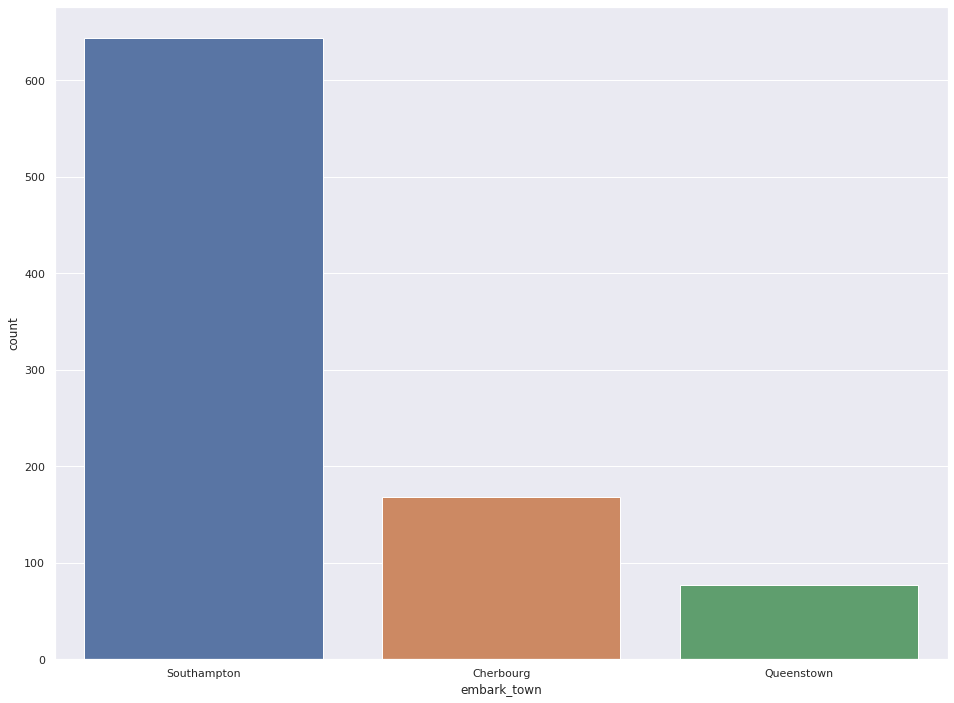

In [7]:
sns.countplot(data=titanic_df, x='embark_town')

Something important that I would like to mention here is that this serves as a method to validate sample size, if e.g. only a handful persons would embark on a location, the statistics in this group will have a high variance which will not always shot in your visualisations. 
Be mindful to check sample sizes of categories when applying statistics.

The bar chart is ideal to compare the values to eachother, yet if we would like to visualise the proportions to eachother, we need a pie plot.
Here we use the 'who' feature containing information about the person itself, we have 3 categories: man, woman, child.

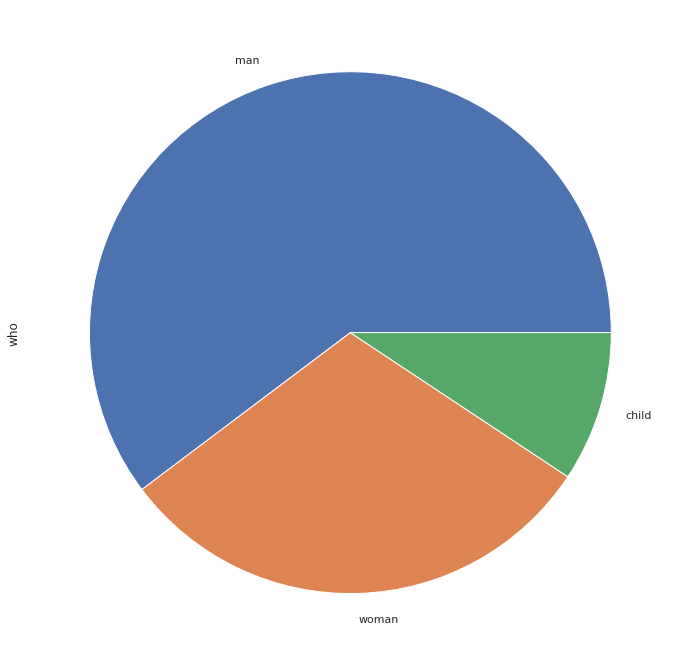

In [8]:
titanic_df.who.value_counts().plot.pie()

The saying goes 'Woman and children first' which would mean the survivors are mainly those 2 groups, let us confirm that by subselecting only the survivors and recreate the pie plot.

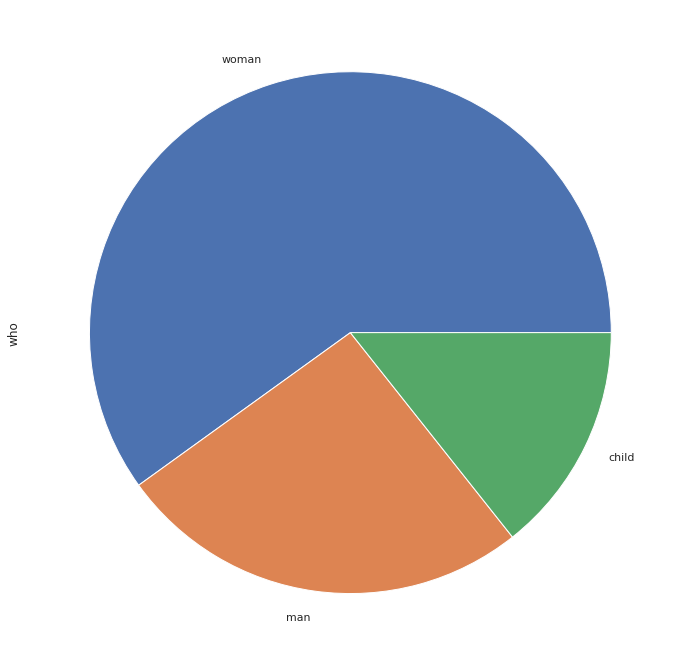

In [9]:
titanic_df[titanic_df.survived==1].who.value_counts().plot.pie()

You can see that the groups are now reversed, where men are proportionally less represented.
By using a pie plot we circumvent the problem where we have a bias towards size of our dataset, the pie plot applies scaling by itself.

### Ordinal data
Whilst there was no order in the town where passengers embarked, there is in the class of the ticket they bought. So we need to keep this in mind when exploring. We can not just say they belonged to any class as there is a difference in these classes! However the same statistics apply, but with a different twist.

In [10]:
titanic_df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [11]:
titanic_df['class'].value_counts()/len(titanic_df)

Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64

it seems more people travelled on the titanic in first class than second class! nothing you would see nowadays.

In [12]:
statistics.mode(titanic_df['class'])

'Third'

In [13]:
statistics.median(titanic_df['class'])

'Third'

Here we can use the median, as there is an order in the classes! By using a bar plot we can visualise the distribution, because the graphing library knows the order of the categories, they will also be properly displayed, how convenient.

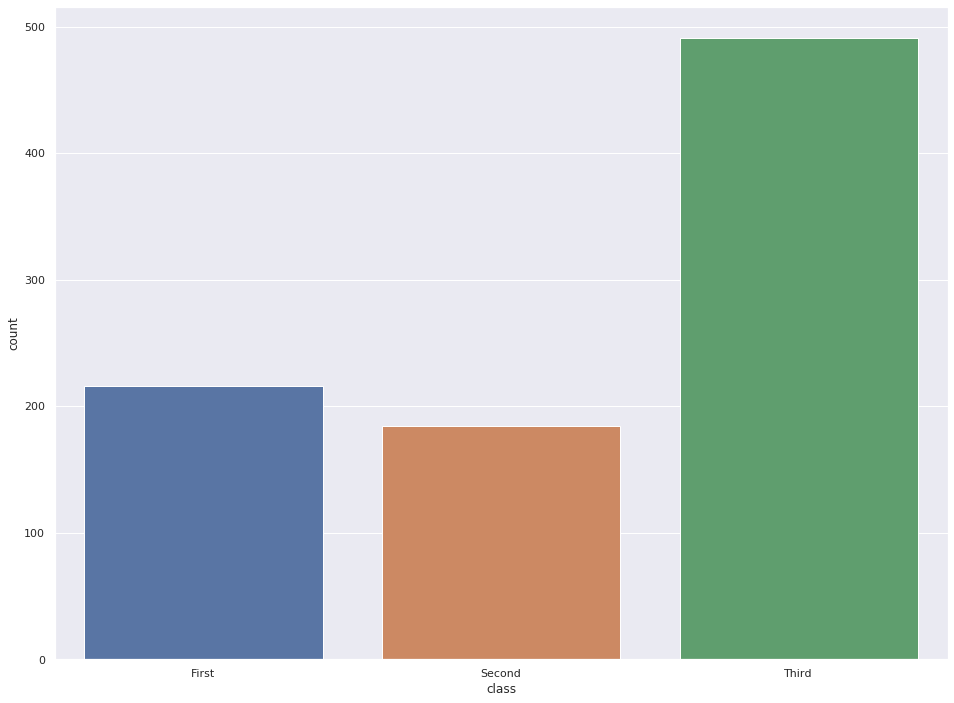

In [14]:
sns.countplot(data=titanic_df, x='class')

You could however also create a line plot with this, as there is a relation between the classes, as shown below.

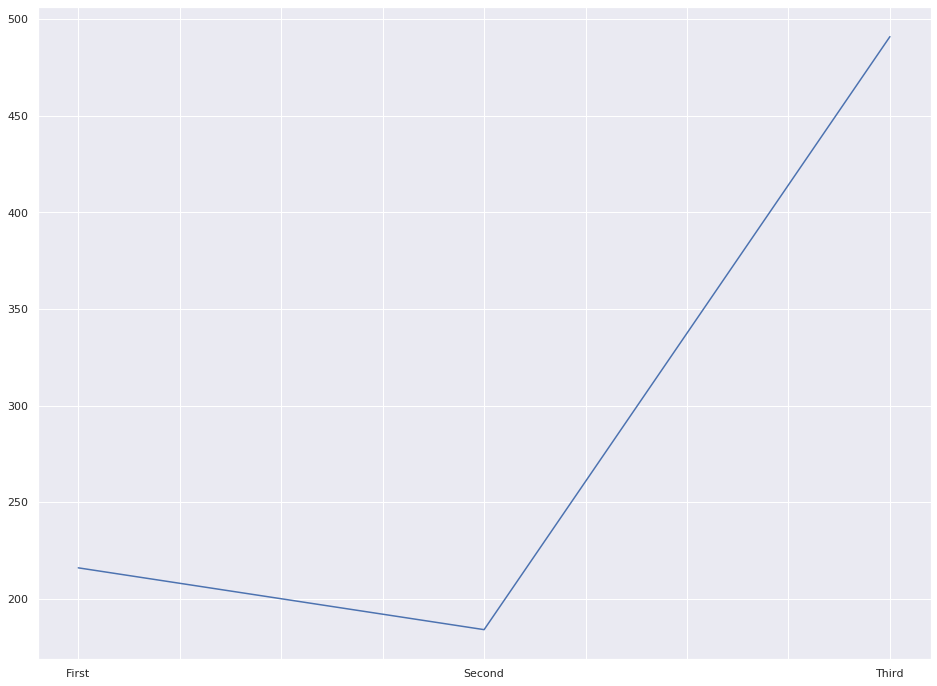

In [15]:
titanic_df['class'].value_counts()[['First', 'Second', 'Third']].plot()

This plot feels underwhelming with only 3 points, but we could make it more interesting, we divide our data on who survived and count the amount of persons per class that survived or not. It is clear to say the a higher class meant higher chances of survival.

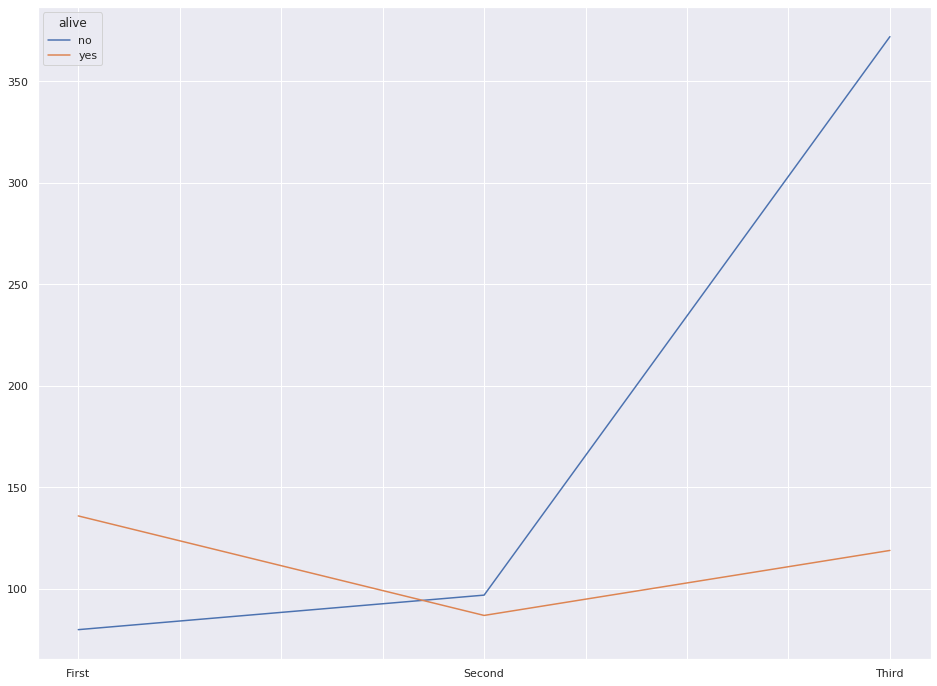

In [16]:
titanic_df['class'].groupby(titanic_df.alive).apply(lambda x: x.value_counts()).unstack(0).reindex(['First', 'Second', 'Third']).plot()

Personally as there is no time related factor in our x-axis, the line or parallel plot here is not as convenient.
Since we have a situation where there is a confinement that the amount of survived can not be more that the total, I would opt for a bar plot, which is show below.

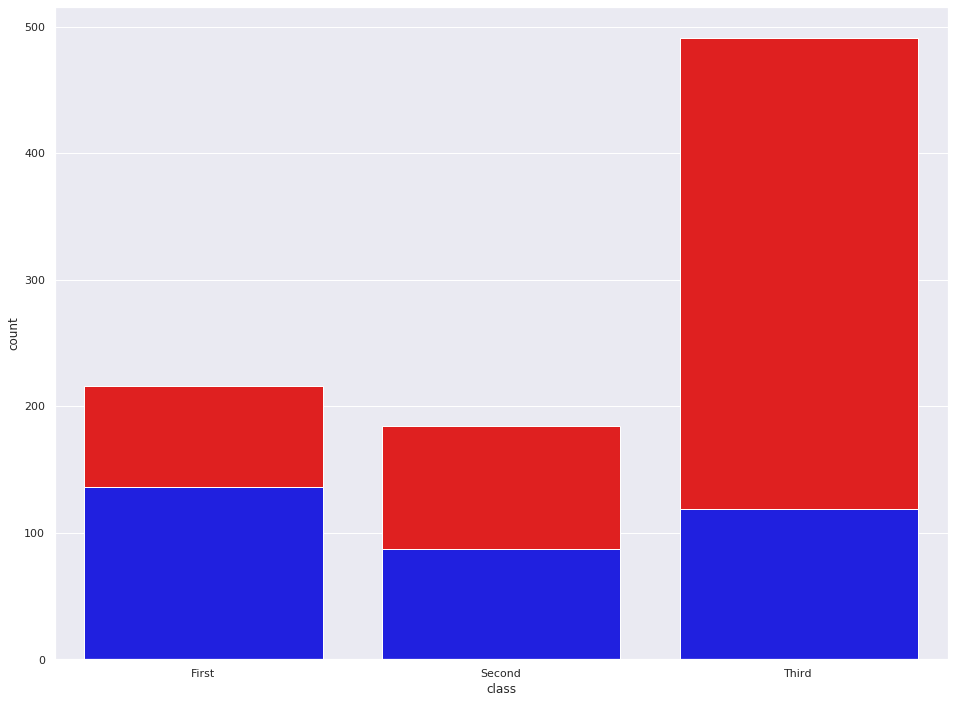

In [17]:
sns.countplot(x = 'class', data = titanic_df, color = 'red')
sns.countplot(x = 'class', data = titanic_df[titanic_df.survived==1], color = 'blue')

### Continuous data

After categories which are discrete we also have continuous data, which is by nature always ordered. Here we can perform all the other statistical methods along with the mean, but again keep in mind that using the mean does come with a lot of responsibility.

In [18]:
statistics.mode(titanic_df['age'])

24.0

In [19]:
statistics.median(titanic_df['age'].dropna())

28.0

In [20]:
statistics.mean(titanic_df['age'].dropna())

29.699117647058824

A very potent method of showing the distribution is a histogram or distribution plot as shown below, here we can see the long tail on the right which we correctly predicted earlier when we saw that the mean was slightly higher than the median.

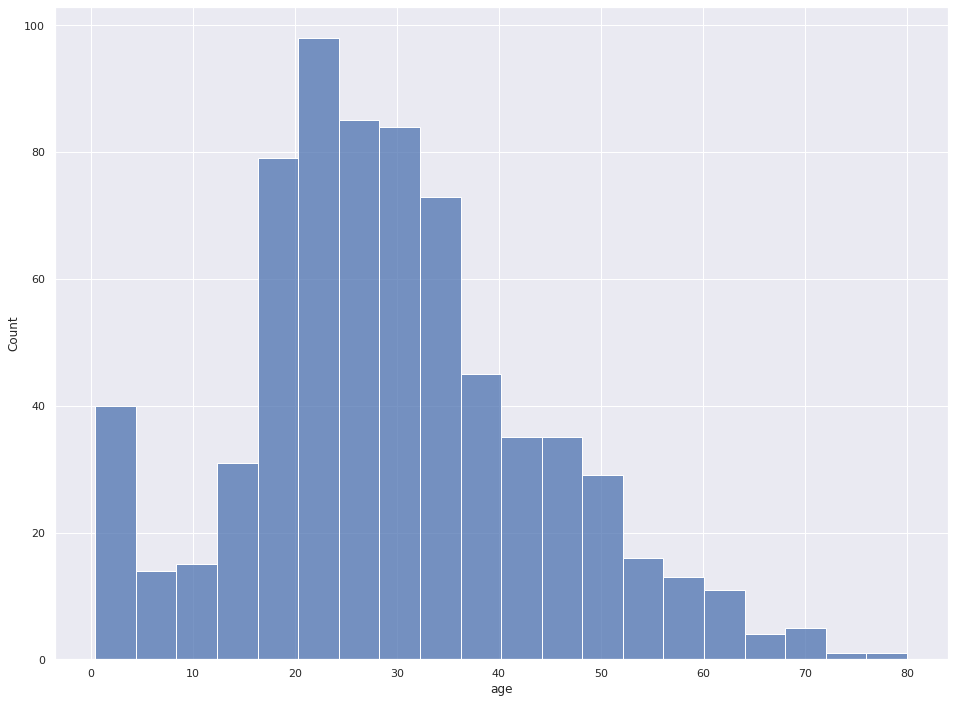

In [21]:
sns.histplot(titanic_df['age'])

going into more mathematical calculations, we can calculate the interquartile ranges, the upper and lower bounds and therefore find any outliers

In [22]:
q1, q3 = titanic_df['age'].quantile([0.25, 0.75])
q3-q1

17.875

In [23]:
lower_bound = q1 - (1.5 * q1)
upper_bound = q3 + (1.5 * q3)
lower_bound, upper_bound

(-10.0625, 95.0)

It seems that for age, no outliers have been found, which is not really suprising as you don't have any control over your age, unfortunately...

Another numerical feature they had control over was the fare, we give a visualisation of the distrubition here.

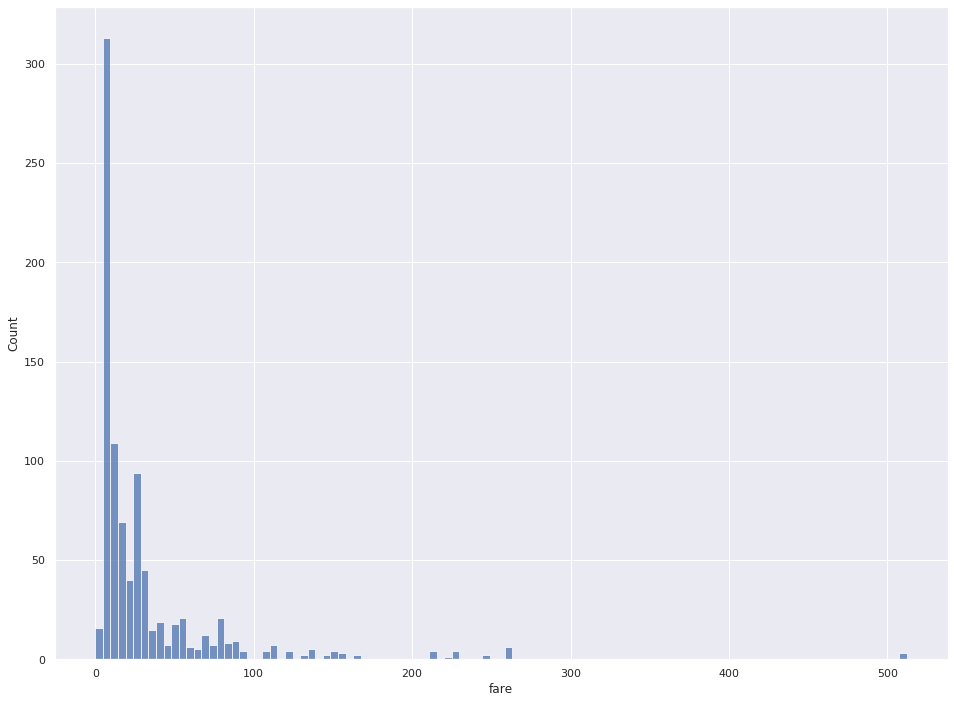

In [24]:
sns.histplot(titanic_df['fare'])

This distribution looks horrific, we could also look at the mean and median differences to see this tremendous shift towards higher fares.

In [25]:
print('median')
print(titanic_df.fare.median())
print('mean')
print(titanic_df.fare.mean())

median
14.4542
mean
32.204207968574636


Perhaps you can use the outlier detection of above to find the upper outlier treshold?

Let us assume that the upper bound for fares is about 50, which is lower than some tickets.
By removing these values we can correct our distribution and get a more evened out result.
This is especially useful in cases of machine learning where we would not not our algorithm to be biased due to a few extraordinary values, we would have to seperate these specific cases to ensure higher accuracy.

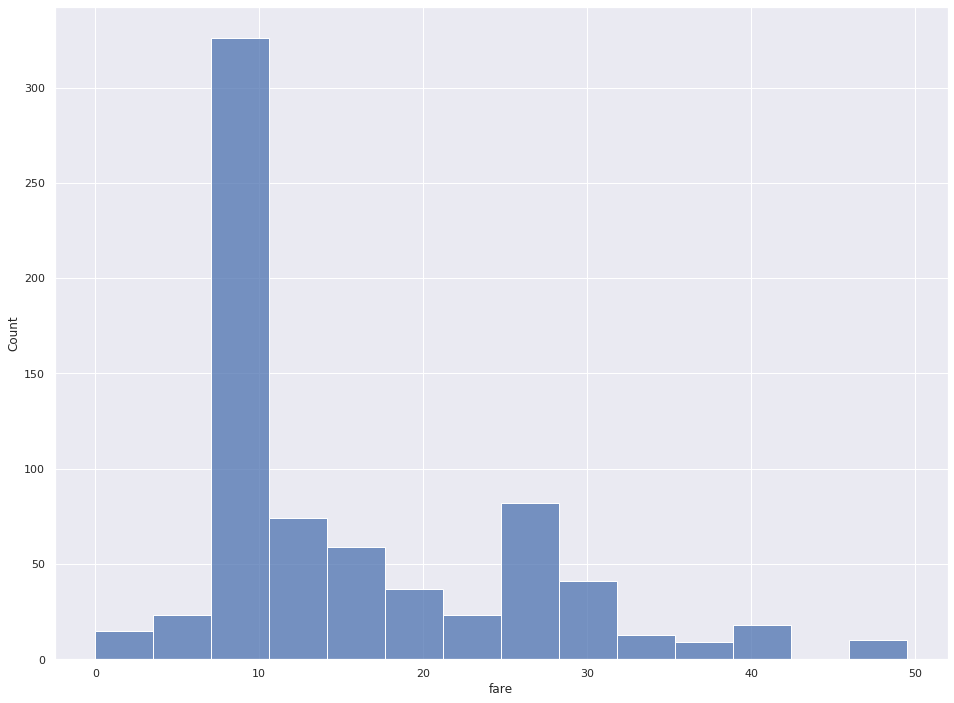

In [26]:
sns.histplot(titanic_df[titanic_df.fare<50].fare)

Much better, here we can clearly see our values, keep the records with outliers seperate for other purposes.
Again looking at the new mean and median we see a lot less difference, indicating a better distribution.

In [27]:
print('median')
print(titanic_df[titanic_df.fare<50].fare.median())
print('mean')
print(titanic_df[titanic_df.fare<50].fare.mean())

median
11.1333
mean
15.500598493150687
